In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

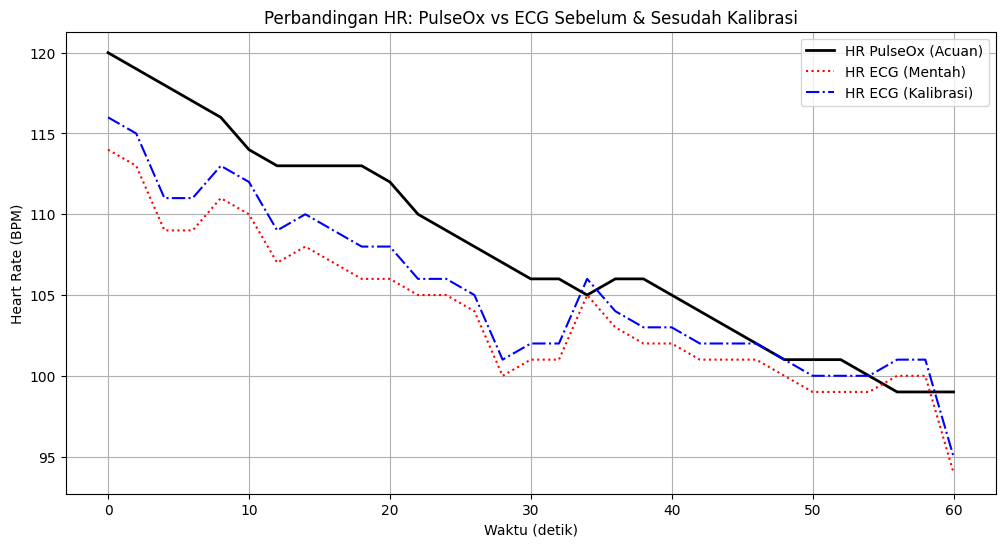

In [54]:
# ==== BACA DATA ====
df = pd.read_csv("data1hrx.csv")

# ==== PLOT ====
plt.figure(figsize=(12, 6))
plt.plot(df["window_start_s"], df["HR_PulseOx"], label="HR PulseOx (Acuan)", color="black", linewidth=2)
plt.plot(df["window_start_s"], df["HR_ECG"], label="HR ECG (Mentah)", linestyle='dotted', color="red")
plt.plot(df["window_start_s"], df["HR_ECG_Corrected"], label="HR ECG (Kalibrasi)", linestyle='dashdot', color="blue")

plt.xlabel("Waktu (detik)")
plt.ylabel("Heart Rate (BPM)")
plt.title("Perbandingan HR: PulseOx vs ECG Sebelum & Sesudah Kalibrasi")
plt.legend()
plt.grid()
plt.show()

In [55]:
# ==== FILTER DATA YANG ADA HR_PulseOx ====
df_valid = df.dropna(subset=["HR_PulseOx"])

# Konversi ke array numerik
pulseox = df_valid["HR_PulseOx"].values
hr_ecg = df_valid["HR_ECG"].values
hr_corrected = df_valid["HR_ECG_Corrected"].values

# ==== HITUNG ERROR SEBELUM KALIBRASI ====
mae_before = mean_absolute_error(pulseox, hr_ecg)
rmse_before = np.sqrt(mean_squared_error(pulseox, hr_ecg))

# ==== HITUNG ERROR SESUDAH KALIBRASI ====
mae_after = mean_absolute_error(pulseox, hr_corrected)
rmse_after = np.sqrt(mean_squared_error(pulseox, hr_corrected))

# ==== CETAK HASIL ====
print(f"[SEBELUM Kalibrasi] MAE : {mae_before:.2f} BPM | RMSE : {rmse_before:.2f} BPM")
print(f"[SESUDAH Kalibrasi] MAE : {mae_after:.2f} BPM | RMSE : {rmse_after:.2f} BPM")


[SEBELUM Kalibrasi] MAE : 4.10 BPM | RMSE : 4.69 BPM
[SESUDAH Kalibrasi] MAE : 2.94 BPM | RMSE : 3.42 BPM
